See: https://huggingface.co/blog/dhuynh95/automatic-hallucination-detection

and its Google Colab Jupyter notebook

In [ ]:
!pip install selfcheckgpt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached

If local:

In [ ]:
filename = input("Enter filepath: ")

KeyboardInterrupt: Interrupted by user

If on Google Colab:

In [ ]:
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving HALLUCINATION_results.json to HALLUCINATION_results.json


In [ ]:
import json

with open(filename, "r") as file:
  hallucination_results = json.load(file)

In [ ]:
!pip install nltk

In [ ]:
# Split response into series of strings
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import re
from nltk.tokenize import sent_tokenize


results = []

for result in hallucination_results:
  prompt = result["prompt"]
  response = result["response"]
  perplexity = result["perplexity"]
  # sentences = sent_tokenize(response)

  sentences = re.split(r'(?<!\d)\. ', response)
  samples = result["samples"]

  results.append({
      "prompt": prompt,
      "response": response,
      "perplexity": perplexity,
      "sentences": sentences,
      "samples": samples
  })

  print(sentences)

results = pd.DataFrame(results)

['To progress in Self Attachment Therapy (SAT), you will engage in a combination of structured exercises and discussions', 'The exercises are designed to help you connect with your inner child, understand your emotions, and develop self-compassion', 'These exercises will guide you through exploring different aspects of your emotional well-being and relationships.\n\nDuring our sessions, we will alternate between completing specific exercises and having discussions about your thoughts and feelings', 'The exercises will help you practice self-compassion, empathy, and understanding towards yourself and others', 'The discussions will provide you with a safe space to express your emotions, thoughts, and experiences.\n\nBy actively participating in both the exercises and discussions, you will progress in your self-awareness, emotional intelligence, and ability to form healthier relationships with yourself and others', "If you're ready, we can start with the first exercise to help you get to 

In [ ]:
results

,prompt,response,perplexity,sentences,samples
0,What do I need to do in order to progress? Do ...,"To progress in Self Attachment Therapy (SAT), ...",1.001388,"[To progress in Self Attachment Therapy (SAT),...","[To progress in Self Attachment Therapy, you c..."
1,Could we practice overcoming past pain please?,I'm really sorry to hear that you're strugglin...,1.000326,[I'm really sorry to hear that you're struggli...,[I'm really sorry to hear that you're struggli...
2,Can we talk about my feelings and experiences?,"Of course, we can definitely talk about your f...",1.004096,"[Of course, we can definitely talk about your ...","[Absolutely, we can definitely talk about your..."
3,Could you suggest something that would help me...,I understand that tackling tasks you've been p...,1.004287,[I understand that tackling tasks you've been ...,[I understand that procrastination can be chal...
4,I need an exercise that can directly (or as di...,I appreciate your request for a motivating exe...,1.002765,[I appreciate your request for a motivating ex...,"[Absolutely, I can provide you with an exercis..."
...,...,...,...,...,...
57,"Singing, huh? I'm not much of a singer, but I ...",For the exercise of singing a song of affectio...,1.001502,[For the exercise of singing a song of affecti...,[For the exercise of singing a song of affecti...
58,"Alright, I'll pick a song that I remember liki...",Take your time to choose a song that resonates...,1.003184,[Take your time to choose a song that resonate...,[Take your time to choose a song that resonate...
59,"Okay, I sang the song. It was a bit strange at...",It's completely normal for singing to your inn...,1.002536,[It's completely normal for singing to your in...,[It's completely normal for the exercise to br...
60,"Hey, I'm Jose.","Hello Jose, it's nice to meet you. How are you...",1.001871,"[Hello Jose, it's nice to meet you, How are yo...","[Hello, Jose! It's great to have you here. How..."


In [ ]:
!pip install tqdm

In [ ]:
import torch
import pandas as pd

from tqdm import tqdm
from selfcheckgpt.modeling_selfcheck import SelfCheckNLI

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
selfchecknli = SelfCheckNLI(device=device)

def calc_nli(hallucination_results):
  hallucination_results.loc[:, "nli"] = None
  for i, row in tqdm(hallucination_results.iterrows()):
    sentences = row["sentences"]
    samples = row["samples"]
    nli = selfchecknli.predict(
      sentences = sentences,
      sampled_passages = samples,
    )
    hallucination_results.at[i, "nli"] = list(nli)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

SelfCheck-NLI initialized to device cuda


In [ ]:
calc_nli(results)

62it [01:53,  1.83s/it]


In [ ]:
results["avg_nli"] = results["nli"].apply(lambda scores: sum(scores) / len(scores))
results["max_nli"] = results["nli"].apply(max)


In [ ]:
results

,prompt,response,perplexity,sentences,samples,nli
0,What do I need to do in order to progress? Do ...,"To progress in Self Attachment Therapy (SAT), ...",1.001388,"[To progress in Self Attachment Therapy (SAT),...","[To progress in Self Attachment Therapy, you c...","[0.1478968096897006, 0.0069398677034769206, 0...."
1,Could we practice overcoming past pain please?,I'm really sorry to hear that you're strugglin...,1.000326,[I'm really sorry to hear that you're struggli...,[I'm really sorry to hear that you're struggli...,"[0.02661563951987773, 0.0033600450493395328, 0..."
2,Can we talk about my feelings and experiences?,"Of course, we can definitely talk about your f...",1.004096,"[Of course, we can definitely talk about your ...","[Absolutely, we can definitely talk about your...","[0.00244438395020552, 0.0007962159928865731, 0..."
3,Could you suggest something that would help me...,I understand that tackling tasks you've been p...,1.004287,[I understand that tackling tasks you've been ...,[I understand that procrastination can be chal...,"[0.0622321794857271, 0.7420511394739151, 0.013..."
4,I need an exercise that can directly (or as di...,I appreciate your request for a motivating exe...,1.002765,[I appreciate your request for a motivating ex...,"[Absolutely, I can provide you with an exercis...","[0.08874682490713895, 0.0035696729202754794, 0..."
...,...,...,...,...,...,...
57,"Singing, huh? I'm not much of a singer, but I ...",For the exercise of singing a song of affectio...,1.001502,[For the exercise of singing a song of affecti...,[For the exercise of singing a song of affecti...,"[0.0008114831114653498, 0.0003492611445835792,..."
58,"Alright, I'll pick a song that I remember liki...",Take your time to choose a song that resonates...,1.003184,[Take your time to choose a song that resonate...,[Take your time to choose a song that resonate...,"[0.0009764786809682846, 0.0031207660562358797,..."
59,"Okay, I sang the song. It was a bit strange at...",It's completely normal for singing to your inn...,1.002536,[It's completely normal for singing to your in...,[It's completely normal for the exercise to br...,"[0.2592222258448601, 0.00877762883901596, 0.00..."
60,"Hey, I'm Jose.","Hello Jose, it's nice to meet you. How are you...",1.001871,"[Hello Jose, it's nice to meet you, How are yo...","[Hello, Jose! It's great to have you here. How...","[0.2484124041744508, 0.025770356110297144]"


In [ ]:
results = results.drop(columns=["avg_nli", "max_nli"])

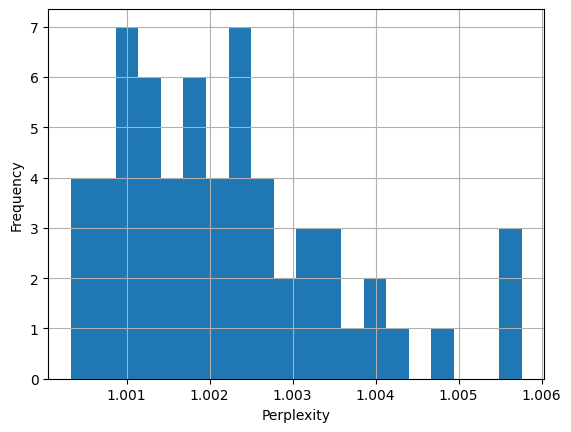

In [ ]:
import matplotlib.pyplot as plt

results["perplexity"].hist(bins=20)

plt.xlabel("Perplexity")
plt.ylabel("Frequency")

plt.savefig("perplexity.pdf")

plt.show()

In [ ]:
split_results = []

for _, row in results.iterrows():
  for i, (sentence, nli) in enumerate(zip(row["sentences"], row["nli"])):
    to_add = {
        "sentence": sentence,
        "nli": nli,
        "perplexity": row["perplexity"]
    }
    split_results.append(to_add)

split_results = pd.DataFrame(split_results)

In [ ]:
split_results

,sentence,nli,perplexity
0,"To progress in Self Attachment Therapy (SAT), ...",0.147897,1.001388
1,The exercises are designed to help you connect...,0.006940,1.001388
2,These exercises will guide you through explori...,0.015217,1.001388
3,The exercises will help you practice self-comp...,0.017030,1.001388
4,The discussions will provide you with a safe s...,0.015863,1.001388
...,...,...,...
269,I'm sorry to hear that you've been feeling unm...,0.669685,1.003692
270,It's important to offer yourself compassion du...,0.000652,1.003692
271,"Imagine your childhood self, currently overwhe...",0.008303,1.003692
272,Just like a nurturing parent would comfort a d...,0.000275,1.003692


In [ ]:
split_results["nli"].describe()

count    274.000000
mean       0.067842
std        0.134250
min        0.000196
25%        0.001958
50%        0.008293
75%        0.058935
max        0.742051
Name: nli, dtype: float64

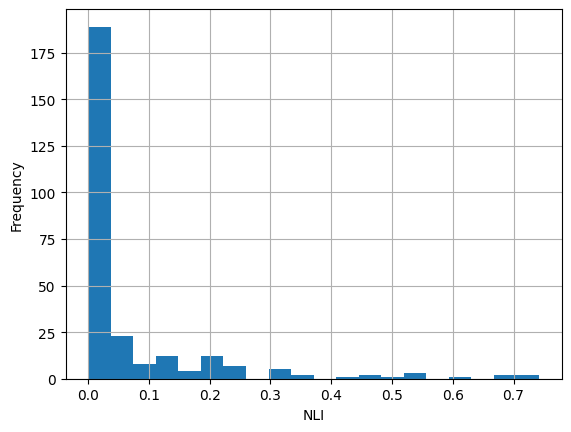

In [ ]:
import matplotlib.pyplot as plt

split_results["nli"].hist(bins=20)

plt.xlabel("NLI")
plt.ylabel("Frequency")

plt.savefig("nli.pdf")

plt.show()

In [ ]:
(split_results["nli"] > 0.5).sum()

9

In [ ]:
split_results["nli"].corr(split_results["perplexity"])

0.07646873735740813